## Lab 2a: Exploring wildfire occurrence data in Python

**Objectives:**
   * Explore a large wildfire dataset using `pandas` and `geopandas`.
   * Query `pandas DataFrames` and find descriptive statistics
   * Filter and aggregate `pandas DataFrames`
   * Plot time-series data

In [14]:
# Import modules
import pandas as pd
import geopandas as gpd
import datetime
from cenpy import products
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

pd.set_option("display.max_columns", None)  #Display all columns of dataframe

In [2]:
# Define wildfire data filepath
pathname = './data/'

# Read data
df = gpd.read_file(pathname + 'or_1992-2018.shp') # 'df' stands for DataFrame
df["datetime"] = pd.to_datetime(df['DISCOVERY_'], format='%Y/%m/%d %H:%M:%S.%f')

# Define census product
acs = products.ACS(2019)

## Question 1 (20 points): 

Make a **new file** (either a Jupyter Notebook or Spyder `.py` file) and name it `lab2_submission.ipynb`. Write some code to answer the following questions:

* a) Which **county** had the most **human** caused wildfires **>50 acres**? (HINT: use the `FIPS_NAME` column)
* b) Which **month** had the most **natural** caused wildfires **>100 acres**?
* c) How many fires **>200 acres** have an **undetermined** cause (e.g. `Missing data/not specified/undetermined`?
* d) What is the name, date, and county of the **largest sized fire**?
* e) How many wildfires in **Lane County** were **>50 acres**?

*Remember, focus on adapting the example code rather than writing your own from scratch.*

In [3]:
df_human_50 = df[(df["FIRE_SIZE"] > 50) & (df["NWCG_CAUSE"] == "Human")].copy()
county_most_human_50 = (df_human_50["FIPS_NAME"].value_counts().index)[0]
print("The county with the most human caused fires larger than 50 acres was " + str(county_most_human_50) + ".")

The county with the most human caused fires larger than 50 acres was Wasco County.


In [4]:
df_natural_100 = df[(df["FIRE_SIZE"] > 100) & (df["NWCG_CAUSE"] == "Natural")].copy()
month_most_natural_100 = (df_natural_100["datetime"].dt.month.value_counts().index)[0]
datetime_object = datetime.datetime.strptime(str(month_most_natural_100), "%m")
month_most_natural_100 = datetime_object.strftime("%B")
print("The month with the most nature wildfires larger than 100 acres was " + str(month_most_natural_100) + ".")

The month with the most nature wildfires larger than 100 acres was August.


In [5]:
df_unknown_200 = df[(df["FIRE_SIZE"] > 200) & (df["NWCG_CAUSE"] == "Missing data/not specified/undetermined")].copy()
num_unknown_200 = len(df_unknown_200)
print("There were " + str(num_unknown_200) + " wildfires larger than 200 acres with an undetermined cause.")

There were 13 wildfires larger than 200 acres with an undetermined cause.


In [6]:
s_largest_fire = df.iloc[df["FIRE_SIZE"].idxmax()]
print("The largest fire was named " + s_largest_fire["FIRE_NAME"] + ", which occured on " + str(s_largest_fire["datetime"].date()) 
      + ", in " + s_largest_fire["COUNTY"] + " County.")

The largest fire was named LONG DRAW, which occured on 2012-07-08, in Malheur County.


In [17]:
df_lane_50 = df[(df["FIRE_SIZE"] > 50) & (df["FIPS_NAME"] == "Lane County")].copy()
lane_50 = len(df_lane_50)
print("There were " + str(lane_50) + " wildfires in Lane County which were greater than 50 acres.")

There were 33 wildfires in Lane County which were greater than 50 acres.


*********

## Question 2 (20 points): 
* a) Write some more code in `lab2_submission.ipynb` to produce a chloropleth map for a city, county or state showing a Census variable (or derived variable) of your choice. Consider choosing a place or variable that inetrests you. The following is a useful guide: https://nbviewer.org/github/ljwolf/cenpy/blob/master/notebooks/product-api.ipynb?flush_cache=true

Note that:
* If your map represents a state, use county level data
* If your map represents a county or city, use tract level data

The following table provides a list of Census variables: https://api.census.gov/data/2019/acs/acs5/variables.html

In [9]:
# Print list of variables
acs.filter_variables('B07001_065E')

# Download data
moved_to_OR = products.ACS(2019).from_state('OR', level='county',
                                        variables=['B07001_065E'])

# Calculate some stats
moved_to_OR['B07001_065E'].describe()

count       36.000000
mean      3893.611111
std       6666.955365
min         28.000000
25%        536.250000
50%       1729.000000
75%       3180.000000
max      32811.000000
Name: B07001_065E, dtype: float64

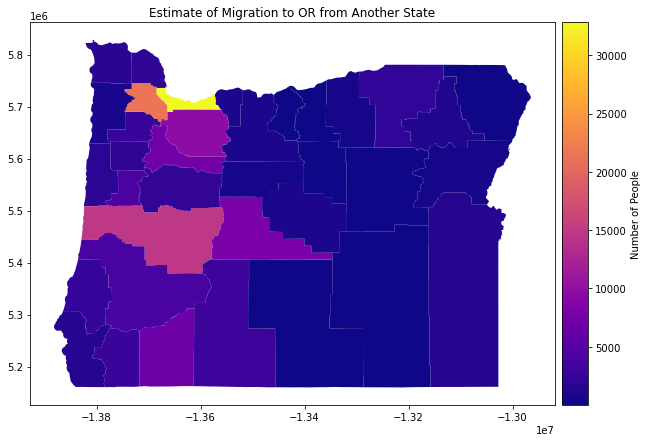

In [10]:
# Plot map
f, ax = plt.subplots(1, 1, figsize=(10,10))
ax.set_title("Estimate of Migration to OR from Another State")

# These two lines make the colorbar the same size as the axes.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

moved_to_OR.plot('B07001_065E', ax=ax, cmap='plasma', legend=True, cax=cax, legend_kwds={'label': "Number of People"});

## Task 3 (10 points):
* a) Save your answers notebook, commit and push to GitHub using instructions from Lab 1
* c) Also upload your answers as a <code>.pdf</code> to Canvas